![](https://drive.google.com/uc?export=view&id=1rqx5wh7U-8OdKlr4L38QNGggEXSKyXHC)

---


<h1>5.1 Exploratory Data Analysis</h1>



## Libraries

Importing all the libraries needed for the analysis and reading the files

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from folium import plugins
from IPython.display import Image
import warnings

In [9]:
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('listings.csv')
rev_1 = pd.read_csv('reviews1.csv')
rev_2 = pd.read_csv('reviews2.csv')
rev_3 = pd.read_csv('reviews3.csv')
rev_4 = pd.read_csv('reviews4.csv')

## 1. How many samples and features does each file have?

In [11]:
print("The shape of listings.csv is {} \n".format(df.shape))

rev = [rev_1, rev_2, rev_3, rev_4]
for i in range(0,4):
  print("The shape of reviews{}.csv is {}".format(i+1, rev[i].shape))

The shape of listings.csv is (9582, 67) 

The shape of reviews1.csv is (100000, 6)
The shape of reviews2.csv is (100000, 6)
The shape of reviews3.csv is (100000, 6)
The shape of reviews4.csv is (106607, 6)


## 2. What are the types of your features?

Concatenating the review dataframes into one named "rev"

In [12]:
rev = pd.concat([rev_1, rev_2, rev_3, rev_4])

Through <i>info()</i> method, we get an idea on the type of each column and the number of their non-null values

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 67 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9582 non-null   int64  
 1   listing_url                                   9582 non-null   object 
 2   scrape_id                                     9582 non-null   int64  
 3   last_scraped                                  9582 non-null   object 
 4   name                                          9579 non-null   object 
 5   description                                   9486 non-null   object 
 6   neighborhood_overview                         6622 non-null   object 
 7   picture_url                                   9582 non-null   object 
 8   host_id                                       9582 non-null   int64  
 9   host_url                                      9582 non-null   o

In [14]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406607 entries, 0 to 106606
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     406607 non-null  int64 
 1   id             406607 non-null  int64 
 2   date           406607 non-null  object
 3   reviewer_id    406607 non-null  int64 
 4   reviewer_name  406607 non-null  object
 5   comments       406200 non-null  object
dtypes: int64(3), object(3)
memory usage: 21.7+ MB


## 3. Are there any missing values?

Calculating the number of empty values per column and the number of empty values in total for each dataframe

In [15]:
df.isna().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               3
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               1708
Length: 67, dtype: int64

In [16]:
df.isna().sum().sum()

56123

In [17]:
rev.isna().sum()

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      0
comments         407
dtype: int64

In [18]:
rev.isna().sum().sum()

407

## [Bonus] Are there any duplicated rows in the datasets?

Finding if there are any duplicated rows in each dataset

In [19]:
df.duplicated().sum()

0

In [20]:
rev.duplicated().sum()

0

## 4. How many listings per neighborhood are there?

Calculating the number of listings per neighborhood and printing them in ascending order

In [21]:
df.groupby('neighbourhood_cleansed')['neighbourhood_cleansed'].count().sort_values()

neighbourhood_cleansed
ΠΕΝΤΑΓΩΝΟ                              2
ΡΗΓΙΛΛΗΣ                               3
ΠΡΟΜΠΟΝΑ                               9
ΡΙΖΟΥΠΟΛΗ                             10
ΚΟΛΟΚΥΝΘΟΥ                            18
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                      21
ΠΟΛΥΓΩΝΟ                              24
ΣΕΠΟΛΙΑ                               28
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                        33
ΕΛΛΗΝΟΡΩΣΩΝ                           42
ΝΕΑ ΚΥΨΕΛΗ                            52
ΓΟΥΒΑ                                 53
ΑΝΩ ΠΑΤΗΣΙΑ                           58
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                     61
ΒΟΤΑΝΙΚΟΣ                             62
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                        70
ΑΝΩ ΚΥΨΕΛΗ                            71
ΓΚΑΖΙ                                 72
ΠΕΔΙΟ ΑΡΕΩΣ                           78
ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ                       79
ΚΟΛΩΝΟΣ                               82
ΓΚΥΖΗ                                 88
ΝΙΡΒΑΝΑ                              105
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                  

Text(0.5, 1.0, 'No. of Listings per Neighborhood')

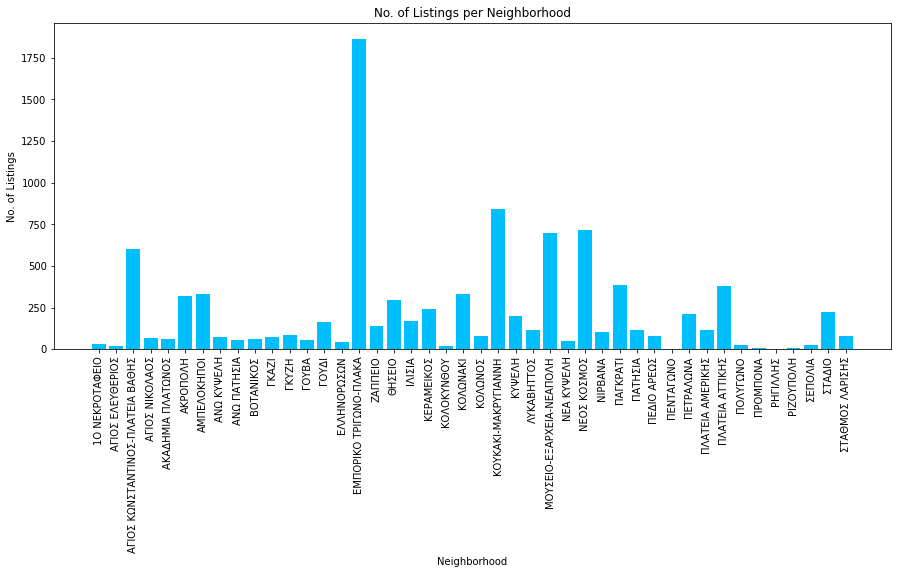

In [22]:
plt.figure(figsize=(15, 6))
plt.bar(sorted(df['neighbourhood_cleansed'].unique()), df.groupby('neighbourhood_cleansed')['neighbourhood_cleansed'].count(), color='deepskyblue', width = 0.8)
plt.xticks(rotation = 90)
plt.locator_params(axis='x', nbins=10)
plt.xlabel("Neighborhood")
plt.ylabel("No. of Listings")
plt.title("No. of Listings per Neighborhood")

## 5. How many listings per room type are there?

In [23]:
df.groupby('room_type')['room_type'].count().sort_values()

room_type
Shared room          90
Hotel room          138
Private room        891
Entire home/apt    8463
Name: room_type, dtype: int64

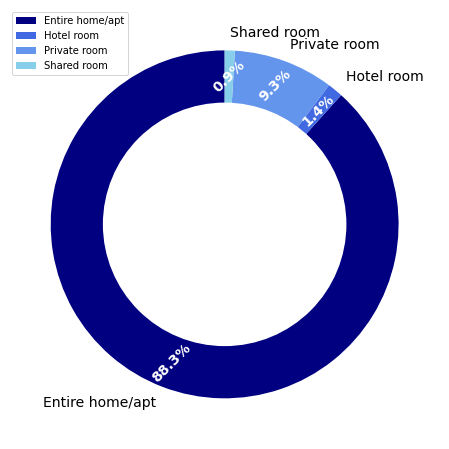

In [24]:
plt.figure(figsize=(18, 8))
a,b,c = plt.pie(df.groupby('room_type')['room_type'].count(), labels=sorted(df['room_type'].unique()), labeldistance=1.1, textprops={'fontsize': 14},
                autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors=['navy','royalblue','cornflowerblue','skyblue'])
centre_circle = plt.Circle((0,0),0.70,fc='white')
plt.gcf().gca().add_artist(centre_circle)
plt.setp(c, **{'color':'white', 'weight':'bold', 'fontsize':14})
[c[i].set_rotation(45) for i in range(len(c))]
plt.legend()

## 6. How many listings per room number are there?

In [25]:
df.groupby('bedrooms')['bedrooms'].count()

bedrooms
1.0     5483
2.0     2579
3.0      507
4.0      132
5.0       29
6.0       28
7.0        4
9.0        1
10.0       5
12.0       1
Name: bedrooms, dtype: int64

## 7. What is the distribution of listings per host? What are the most listings that a single host has?

Finding the number of listings per host based on the entries in dataset <i>listings.csv</i>

In [26]:
df.groupby('host_id')['id'].count().sort_values(ascending=False).to_frame()

,id
host_id,
29927830,156
1621474,75
20104194,74
112527018,65
748818,62
...,...
134105740,1
134285982,1
134347033,1


We can see that the most listings a host has in this dataset are 156

In [27]:
df[['host_id', 'host_total_listings_count']].drop_duplicates('host_id').sort_values(by=['host_total_listings_count'], ascending=False)

,host_id,host_total_listings_count
8123,310835509,2095.0
3792,201738738,352.0
448,1621474,272.0
7711,331327165,248.0
1939,129000409,220.0
...,...,...
7442,700650,0.0
4594,240321984,0.0
1587,26092917,NaN
1791,49043070,NaN


Based on the overall data from the Airbnb platform, we can see that the most listings a host has are 2095. This may be due to the fact that the host might have airbnbs in other regions of Greece, other than Athens, as well. Moreover, we can see that there are some empty cells and some values equal to 0 which are invalid. Thus, we will assign to these the value 1

In [28]:
df['host_total_listings_count'] = df['host_total_listings_count'].apply(lambda x: 1 if x == 0 else x)
df['host_total_listings_count'].fillna(1, inplace=True)

## 8. When was the first host registered?

First, we get the subset where there are no missing values in column <i>host_id</i>. Then, we select column <i>host_id</i>, we sort the subset and select the first element since the <b>sorted</b> function orders the elements in ascending order

In [29]:
print("The first host was registered in " + sorted(df[df['host_since'].notna()]['host_since'])[0])

The first host was registered in 2009-09-08


## 9. What year had the most host registered?

On a preprocessing level, first, we select the subset of the dataframe where the column <i>host_since</i> has no empty cells. Then, we split the values of this column on the separator <b>-</b>. Finally, we select the first element of this list since this corresponds to the registration year and we save this value into a new column in the dataframe <i>df</i> named <i>registration_year</i>

In [30]:
df['registration_year'] = df[df['host_since'].notna()]['host_since'].apply(lambda x: x.split('-')[0])
df.groupby('registration_year')['registration_year'].count().sort_values(ascending=False)

registration_year
2018    1713
2016    1449
2017    1323
2019    1305
2015    1153
2014     725
2020     498
2012     403
2021     384
2013     327
2011     258
2010      35
2009       6
Name: registration_year, dtype: int64

In [31]:
print("The year with the most hosts registered is " + df.groupby('registration_year')['registration_year'].count().sort_values(ascending=False).idxmax())

The year with the most hosts registered is 2018


## 10. How many identified hosts are there? What is their percentage over all hosts?

In [32]:
df.groupby('host_identity_verified')['host_identity_verified'].count()

host_identity_verified
f    2651
t    6928
Name: host_identity_verified, dtype: int64

In [33]:
host_ver_total = len(df['host_identity_verified'])
df.groupby('host_identity_verified')['host_identity_verified'].count()*100/host_ver_total

host_identity_verified
f    27.666458
t    72.302233
Name: host_identity_verified, dtype: float64

In [34]:
for i, j in enumerate(sorted(df[df['host_identity_verified'].notna()]['host_identity_verified'].unique())):
  if j == 'f':
    print("The percentage of host that are not verified is {:.1f}%".format((df.groupby('host_identity_verified')['host_identity_verified'].count()*100/host_ver_total)[i]))
  else:
    print("The percentage of host that are verified is {:.1f}%".format((df.groupby('host_identity_verified')['host_identity_verified'].count()*100/host_ver_total)[i]))

The percentage of host that are not verified is 27.7%
The percentage of host that are verified is 72.3%


## 11. What are the top-20 most common amenities provided by the hosts?

Initially, we turn each value of the column "amenities" into a list and then, change the name of some amenities that belong in the same group (e.g. removing the brand from shampoos, oven etc.) 

In [35]:
df['amenities'] = df['amenities'].apply(lambda x: x.replace('"','').replace('[','').replace(']','').split(', '))

In [36]:
amenities_list = []
df.reset_index(inplace=True, drop=True)

for i in range(0, len(df)):
  for j in df['amenities'][i]:
    if j.lower() not in amenities_list:
      amenities_list.append(j.lower())

In [37]:
for i, k in enumerate(amenities_list):
  j = k.split(' ')
  if 'oven' in j:
    amenities_list[i] = 'oven'
  elif 'stove' in j:
    amenities_list[i] = 'oven'
  elif 'body' in j:
    amenities_list[i] = 'shower gel'
  elif 'shower' in j:
    amenities_list[i] = 'shower gel'
  elif 'shampoo' in j:
    amenities_list[i] = 'shampoo'
  elif 'conditioner' in j:
    amenities_list[i] = 'conditioner'
  elif 'heating' in j:
    amenities_list[i] = 'heating'
  elif 'netflix' in j:
    amenities_list[i] = 'netflix'
  elif 'amazon' in j:
    amenities_list[i] = 'amazon prime'
  elif 'wifi' in j:
    amenities_list[i] = 'internet'
  elif 'ethernet' in j:
    amenities_list[i] = 'internet'
  elif 'game' in j:
    amenities_list[i] = 'game console'
  elif 'refrigerator' in j:
    amenities_list[i] = 'fridge'
  elif 'fridge' in j:
    amenities_list[i] = 'fridge'
  elif 'dedicated' in j:
    amenities_list[i] = 'dedicated workspace'
  elif 'sound' in j:
    amenities_list[i] = 'sound system'
  elif 'tv' in j:
    amenities_list[i] = 'tv'
  elif 'hdtv' in j:
    amenities_list[i] = 'tv'
  elif 'clothing' in j:
    amenities_list[i] = 'clothing storage'
  elif 'gym' in j:
    amenities_list[i] = 'gym'
  elif 'kitchen' in j:
    amenities_list[i] = 'kitchen'
  elif 'parking' in j:
    amenities_list[i] = 'parking'
  elif 'garage' in j:
    amenities_list[i] = 'parking'
  elif 'old' in j:
    amenities_list[i] = 'kids-friendly'
  elif 'baby' in j:
    amenities_list[i] = 'kids-friendly'
  elif 'toys' in j:
    amenities_list[i] = 'kids-friendly'
  elif 'fireplace' in j:
    amenities_list[i] = 'fireplace'
  elif ('pool' in j) and (len(j)<3):
    amenities_list[i] = 'pool'
  else:
    amenities_list[i] = k

Afterwards, we append in the list "amenities_count" all the values appearing in the column "amenities" and apply the transformation described in the previous step

In [38]:
amenities_total_count = []
df.reset_index(inplace=True, drop=True)

for i in range(0, len(df)):
  for j in df['amenities'][i]:
    amenities_total_count.append(j.lower())

In [39]:
for i, k in enumerate(amenities_total_count):
  j = k.split(' ')
  if 'oven' in j:
    amenities_total_count[i] = 'oven'
  elif 'stove' in j:
    amenities_total_count[i] = 'stove'
  elif 'body' in j:
    amenities_total_count[i] = 'shower gel'
  elif 'shower' in j:
    amenities_total_count[i] = 'shower gel'
  elif 'shampoo' in j:
    amenities_total_count[i] = 'shampoo'
  elif 'conditioner' in j:
    amenities_total_count[i] = 'conditioner'
  elif 'heating' in j:
    amenities_total_count[i] = 'heating'
  elif 'netflix' in j:
    amenities_total_count[i] = 'netflix'
  elif 'amazon' in j:
    amenities_total_count[i] = 'amazon prime'
  elif 'wifi' in j:
    amenities_total_count[i] = 'wifi'
  elif 'game' in j:
    amenities_total_count[i] = 'game console'
  elif 'refrigerator' in j:
    amenities_total_count[i] = 'fridge'
  elif 'fridge' in j:
    amenities_total_count[i] = 'fridge'
  elif 'dedicated' in j:
    amenities_total_count[i] = 'dedicated workspace'
  elif 'sound' in j:
    amenities_total_count[i] = 'sound system'
  elif 'tv' in j:
    amenities_total_count[i] = 'tv'
  elif 'hdtv' in j:
    amenities_total_count[i] = 'tv'
  elif 'clothing' in j:
    amenities_total_count[i] = 'clothing storage'
  elif 'gym' in j:
    amenities_total_count[i] = 'gym'
  elif 'kitchen' in j:
    amenities_total_count[i] = 'kitchen'
  elif 'parking' in j:
    amenities_total_count[i] = 'parking'
  elif 'garage' in j:
    amenities_total_count[i] = 'parking'
  elif 'old' in j:
    amenities_total_count[i] = 'kids-friendly'
  elif 'baby' in j:
    amenities_total_count[i] = 'kids-friendly'
  elif 'toys' in j:
    amenities_total_count[i] = 'kids-friendly'
  elif 'fireplace' in j:
    amenities_total_count[i] = 'fireplace'
  elif ('pool' in j) and (len(j)<3):
    amenities_total_count[i] = 'pool'
  else:
    amenities_total_count[i] = k

Calculating the values per amenity category through <i>value_counts()</i> methods and saving these results into a dataframe named "amenities"

In [40]:
amenities = pd.DataFrame(amenities_total_count, columns=['amenity'])

The top 20 amenities are presenting in the following dataframe

In [41]:
amenities['amenity'].value_counts().to_frame().head(20)

,amenity
wifi,9433
tv,9215
essentials,9078
hair dryer,8774
long term stays allowed,8696
air conditioning,8670
kitchen,8631
hangers,8581
shampoo,8257
iron,8246


In [42]:
amenities_dict = amenities['amenity'].value_counts().to_frame().head(20)['amenity'].to_dict()

Text(0.5, 1.0, 'Top 20 Amenities')

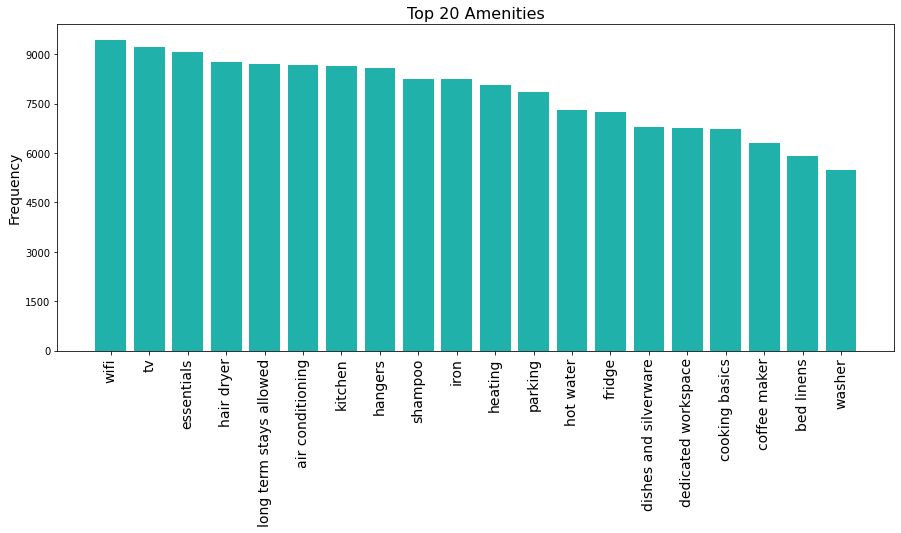

In [44]:
plt.figure(figsize=(15,6))
plt.bar(amenities_dict.keys(), amenities_dict.values(), color='lightseagreen')
plt.xticks(rotation=90, fontsize=14)
plt.locator_params(axis='x', nbins=10)
plt.ylabel("Frequency", fontsize=14)
plt.yticks(np.arange(0, max(amenities_dict.values()), 1500))
plt.title("Top 20 Amenities", fontsize=16)

## 12. What is the distribution of price of each room type?

We select a subset where there are no missing values in the column <i>price</i>. Then, we remove the , and the $ sign. Finally, we transform each value from dollars to euros by multiplying each value by 1.03

In [45]:
df = df[df['price'].notna()]

In [46]:
df['price'] = df['price'].apply(lambda x:float(x.replace('$','').replace(',',''))*1.03)

In [47]:
df.groupby('room_type')['price'].mean()

room_type
Entire home/apt     82.222065
Hotel room         192.132319
Private room       105.507374
Shared room         79.138333
Name: price, dtype: float64

Text(0.5, 1.0, 'Price Distribution per Room Type')

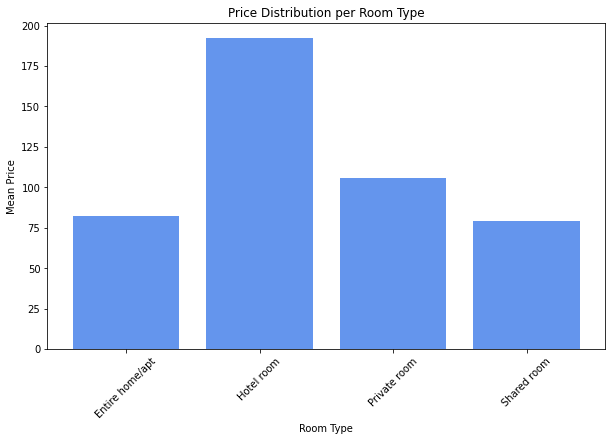

In [48]:
plt.figure(figsize=(10,6))
plt.bar(sorted(df['room_type'].unique()), df.groupby('room_type')['price'].mean(), color='cornflowerblue')
plt.xticks(rotation=45)
plt.xlabel("Room Type")
plt.ylabel("Mean Price")
plt.title("Price Distribution per Room Type")

## [Bonus] Interactive map plot showing the top 3 most expensive neighborhoods, the room type and the price of the listings

We use the first 250 entries of the dataframe <i>df</i> to depict in the following plot. The center of the red circle starts from the coordinates of Acropolis and the radius is 1km. The mini map helps the users understand where they are navigating on the map

In [50]:
df.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)

neighbourhood_cleansed
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                    576.898095
ΒΟΤΑΝΙΚΟΣ                           167.840161
ΖΑΠΠΕΙΟ                             164.573546
ΚΕΡΑΜΕΙΚΟΣ                          120.721066
ΝΕΟΣ ΚΟΣΜΟΣ                         116.924502
ΣΤΑΔΙΟ                              112.722646
ΑΚΡΟΠΟΛΗ                            107.016677
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                   104.013115
ΚΟΛΩΝΑΚΙ                            100.690303
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ               96.223307
ΛΥΚΑΒΗΤΤΟΣ                           92.893675
ΘΗΣΕΙΟ                               89.606497
ΓΚΑΖΙ                                85.847639
ΠΕΤΡΑΛΩΝΑ                            85.528505
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                  85.444685
ΑΜΠΕΛΟΚΗΠΟΙ                          79.569848
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                       76.688182
ΙΛΙΣΙΑ                               75.136105
ΣΕΠΟΛΙΑ                              75.006071
ΝΕΑ ΚΥΨΕΛΗ                           74.873077
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                     

In [52]:
df1 = df[df['neighbourhood_cleansed'] == 'ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ']
df2 = df[df['neighbourhood_cleansed'] == 'ΒΟΤΑΝΙΚΟΣ']
df3 = df[df['neighbourhood_cleansed'] == 'ΖΑΠΠΕΙΟ']


df_top_3 = pd.concat([df1,df2,df3])
df_top_3['price'] = df_top_3['price'].apply(lambda x: round(x,2))

In [55]:
df_map = df_top_3
folium_map = folium.Map(location=[37.9715, 23.7257], zoom_start=14)

latitude = df_map['latitude'].tolist()
longitude = df_map['longitude'].tolist()
room_type = df_map['room_type'].tolist()
price = df_map['price'].apply(lambda x: round(x, 2)).tolist()

folium.Circle(location=(37.9715, 23.7257), radius=1000, fill_color='red').add_to(folium_map)

minimap = plugins.MiniMap()
folium_map.add_child(minimap)

for lat, lon, rt, pr in zip(latitude, longitude, room_type, price):
  folium.Marker(location=[lat,lon], popup=[rt, pr], tooltip='Click for more info').add_to(folium_map)


folium.Marker([37.9356, 23.9484], popup='<i>ATH Airport</i>', tooltip='Airport', icon=folium.Icon(icon='plane', color='red')).add_to(folium_map)
plugins.HeatMap(np.array([latitude,longitude]).T).add_to(folium_map)

folium_map

## [Bonus] Defining visually the neighborhoods mentioned in the dataset based on their geographical coordinates

In [ ]:
fig = px.scatter(df, x='longitude', y='latitude', color='neighbourhood_cleansed', hover_data=['price'])
fig.show()

## [Bonus] Price vs. Beds plot

Plotting the price vs. the number of beds each Airbnb. On top of the plot, the price distribution is also depicted

In [ ]:
fig = px.scatter(df, x='price', y='beds', size='price', hover_data=['price'], marginal_x="histogram")
fig.show()

## 13. How many reviews do I have?

In [ ]:
print("The total number of reviews is " + str(len(rev)))

The total number of reviews is 403947


## 14. Do all listings have reviews?

We create a column named <i>listing_id</i> so that we can concatenate the two datasets on this column

In [ ]:
df['listing_id'] = df['id']
merg = pd.merge(df, rev, on='listing_id')

In [ ]:
merg.groupby('listing_id')['listing_id'].count().sort_values()

listing_id
52810712      1
45679610      1
19126329      1
45650566      1
19131448      1
           ... 
16263103    464
13842245    473
14081186    483
16278854    535
14583913    581
Name: listing_id, Length: 6979, dtype: int64

Since the minimum value of reviews a listings has is 1, then, we conclude that all listings have at least one review